In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [234]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", np.nan)
check_data_more50 = df[(df["salary"] == ">50K") & (df["salary K$"] < 50)]
check_data_less50 = df[(df["salary"] == "<=50K") & (df["salary K$"] > 50)]
check_data_more50, check_data_less50

(Empty DataFrame
 Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
 Index: [])

# Task 1
Print the count of men and women in the dataset.

In [219]:
men = df[df["sex"] == "Male"]
women = df[df["sex"] == "Female"]
(f"Total men: {men.shape[0]}, "
 f"Total women: {women.shape[0]}")

'Total men: 21790, Total women: 10771'

# Task 2
Find the average age of men in dataset

In [220]:
men["age"].mean().round()

39.0

# Task 3
Get the percentage of people from Poland (native-country)

In [221]:
round((df[df["native-country"] == "Poland"].shape[0] * 100 / df.shape[0]), 2)

0.18

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [222]:
people_with_higher_salary = df[df["salary"] == ">50K"]
people_with_smaller_salary = df[df["salary"] == "<=50K"]
result1 = people_with_higher_salary["age"].agg(["mean", "std"]).round(2)
result2 = people_with_smaller_salary["age"].agg(["mean", "std"]).round(2)
result1, result2

(mean    44.25
 std     10.52
 Name: age, dtype: float64,
 mean    36.78
 std     14.02
 Name: age, dtype: float64)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [223]:
people_with_higher_salary[people_with_higher_salary["education"].apply(lambda x: x not in ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])].shape[0]

3306

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [224]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

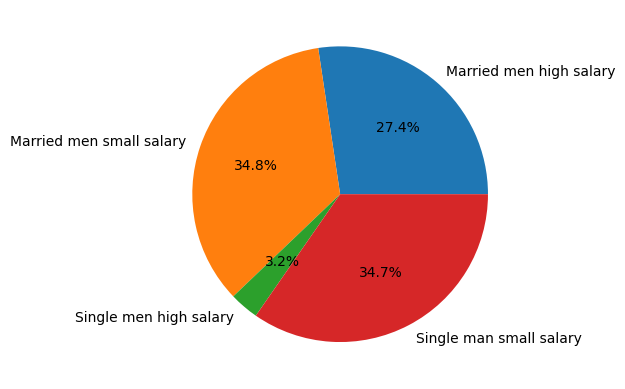

In [225]:
married_men = men[men["marital-status"].str.startswith("Married")]
single_men = men[~men["marital-status"].str.startswith("Married")]
married_men_higher_salary = people_with_higher_salary.merge(married_men, how="inner")
married_men_smaller_salary = people_with_smaller_salary.merge(married_men, how="inner")
single_men_higher_salary = people_with_higher_salary.merge(single_men, how="inner")
single_men_smaller_salary = people_with_smaller_salary.merge(single_men, how="inner")

plot_data = [married_men_higher_salary.shape[0], married_men_smaller_salary.shape[0], single_men_higher_salary.shape[0], single_men_smaller_salary.shape[0]]
plt.pie(plot_data, labels=["Married men high salary", "Married men small salary", "Single men high salary", "Single man small salary"], autopct='%1.1f%%')
plt.show()


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [226]:
df[df["hours-per-week"] == df["hours-per-week"].max()].shape[0]

85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [248]:
df["sex"] = df["sex"].replace({"Male": 1, "Female": 0}, regex=True)
corr = df[["age", "hours-per-week", "salary K$", "sex"]].corr()
print("The more hours-per-week, the higher salary\n"
      "The older age, the higher salary")
corr

The more hours-per-week, the higher salary
The older age, the higher salary


,age,hours-per-week,salary K$,sex
age,1.000000,0.068756,0.201774,-0.088832
hours-per-week,0.068756,1.000000,0.196916,-0.229309
salary K$,0.201774,0.196916,1.000000,-0.182528
sex,-0.088832,-0.229309,-0.182528,1.000000
